# Visualization with Matplotlib

In [0]:
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub

import pandas as pd
import matplotlib.pyplot as plt
# will lead to static images of your plot embedded in the notebook
%matplotlib inline 

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [0]:
plt.style.use('classic')

Available styles:

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

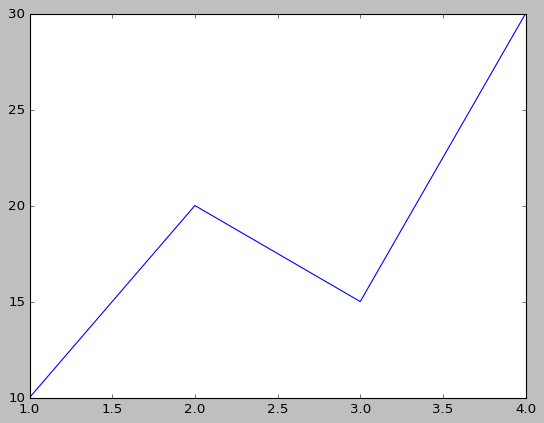

In [4]:
x = [1,2,3,4]
y = [10, 20, 15, 30]
plt.plot(x, y)

Text(0.5, 1.0, 'Interesting Plot')

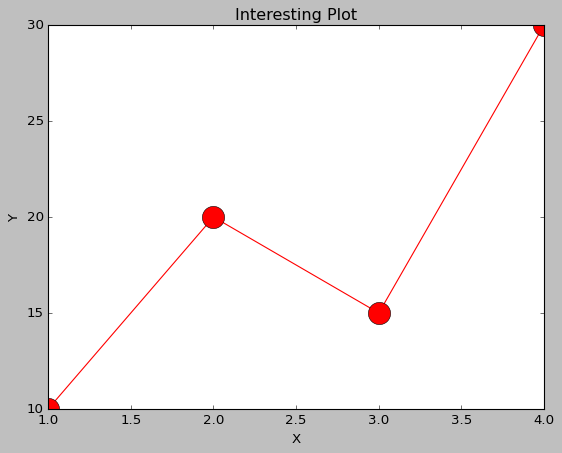

In [5]:
fig = plt.figure()  # so we can use it to save the image

plt.plot(x, y, marker='o', markersize=20, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interesting Plot')

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [0]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [7]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 25K Apr  2 03:42 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

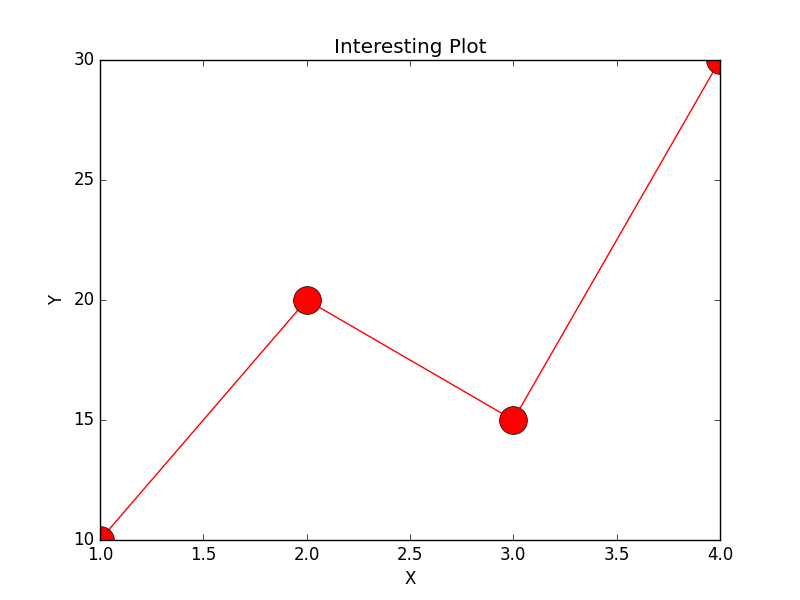

In [8]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [9]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

In [0]:
googl = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/GOOGL.csv', parse_dates=True, index_col= 'Date')
googl_close = googl['Close']
googl_vol = googl['Volume']

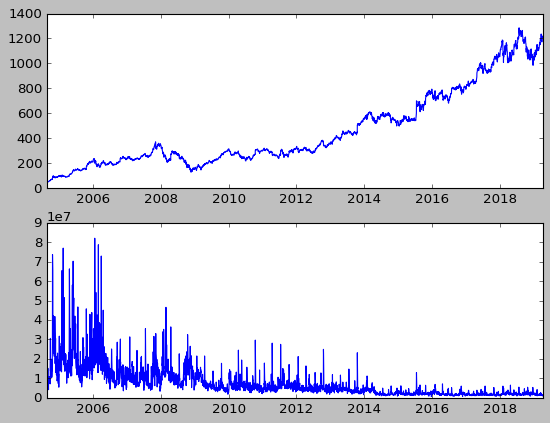

In [11]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(googl_close)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(googl_vol)

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first?

This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, **in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects**.

To re-create the previous plot using this style of plotting, you might do the following:

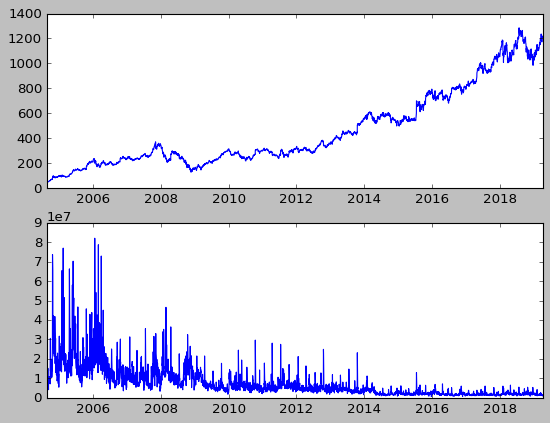

In [12]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(googl_close)
ax[1].plot(googl_vol)

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
We will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight below:

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

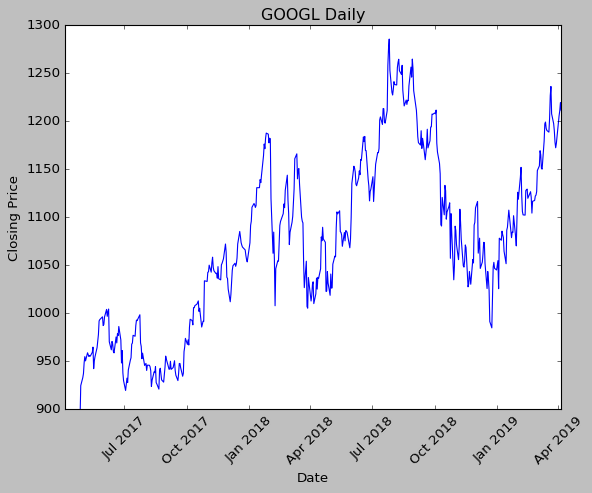

In [13]:
ax = plt.axes()
ax.plot(googl_close)
ax.set(xlim=(pd.to_datetime('2017-04-05'), pd.to_datetime('2019-04-05')), ylim=(900, 1300),
       xlabel='Date', ylabel='Closing Price',
       title='GOOGL Daily')
plt.xticks(rotation=45);

# Your turn

Using the `battles` dataset from Game of Thrones plot a scatter plot that shows the relationship between attacker_size and defender_size in these 38 battles. Use the appropriate `xlim` and `ylim` to make the chart more readable.

Dataset source: [Kaggle: Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)

SPOILER ALERT: if you haven't seen the series and are planning to watch do not dig in too much in this dataset as it contains spoilers. However, since this was extracted based on the books there shouldn't be any final season spoilers.

In [14]:
battles = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/GOT-battles.csv')
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [0]:
# Your asnwer goes here


(-100.0, 21000.0)

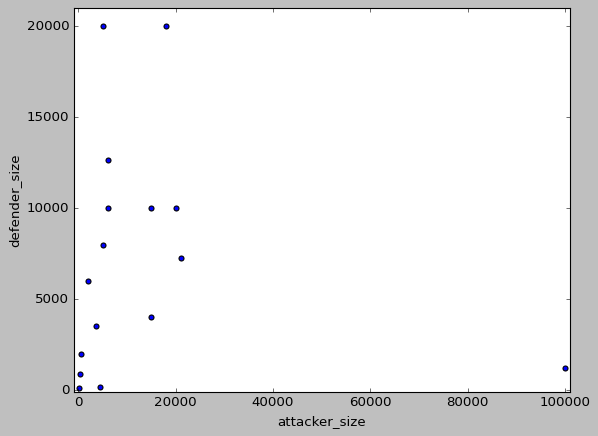

In [15]:
# Don't run this cell to keep the outcome as your frame of reference

In [0]:
# HINT: Uncomment and execute the line below to get help
#disp(hint + '09-01-plot-hint')

In [0]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-01-plot')

Using the `deaths` dataset from Game of Thrones plot a histogram that shows the distribution of character deaths throughout 'Book Intro Chapter'.

Dataset source: [Kaggle: Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)

SPOILER ALERT: if you haven't seen the series and are planning to watch do not dig in too much in this dataset as it contains spoilers. However, since this was extracted based on the books there shouldn't be any final season spoilers.

In [16]:
deaths = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/GOT-character-deaths.csv')
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [0]:
# Your asnwer goes here


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([280., 233., 197., 140.,  55.]),
 array([ 0., 16., 32., 48., 64., 80.]),
 <a list of 5 Patch objects>)

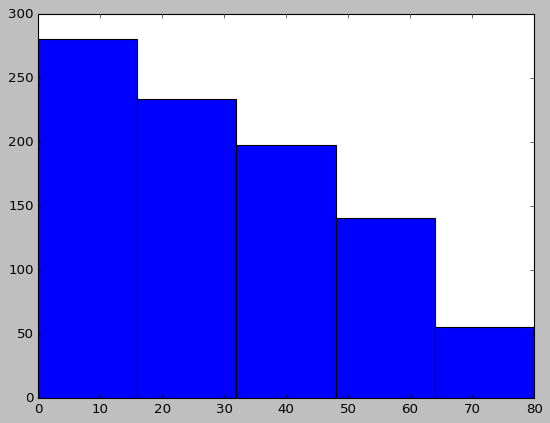

In [17]:
# Don't run this cell to keep the outcome as your frame of reference

In [0]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-01-hist')

## Matplotlib Resources

* [Online Documentation](http://matplotlib.org/)
* [Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)
* [Matplotlib Gallery](http://matplotlib.org/gallery.html)

Notebooks from [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do):
* [Simple Line Plots](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.01-Simple-Line-Plots.ipynb)
* [Simple Scatter Plots](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb)
* [Visualizing Errors](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.03-Errorbars.ipynb)
* [Density and Contour Plots](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.04-Density-and-Contour-Plots.ipynb)
* [Histograms, Binnings, and Density](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.05-Histograms-and-Binnings.ipynb)
* [Customizing Plot Legends](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.06-Customizing-Legends.ipynb)
* [Customizing Colorbars](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.07-Customizing-Colorbars.ipynb)
* [Multiple Subplots](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.08-Multiple-Subplots.ipynb)
* [Text and Annotation](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.09-Text-and-Annotation.ipynb)
* [Customizing Ticks](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.10-Customizing-Ticks.ipynb)
* [Customizing Matplotlib: Configurations and Stylesheets](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.11-Settings-and-Stylesheets.ipynb)
* [Three-Dimensional Plotting in Matplotlib](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.12-Three-Dimensional-Plotting.ipynb)
* [Geographic Data with Basemap](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.13-Geographic-Data-With-Basemap.ipynb)